# Exploratory Data Analysis

Let's have a closer look at our data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

In [3]:
warnings.simplefilter(action='ignore', category=UserWarning)

We will be working with july subset for speed and simplicity

In [4]:
df = pd.read_csv('data/july.csv', index_col='Unnamed: 0')

**Columns and values**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44640 entries, 2020-07-01 00:00:00 to 2020-07-31 23:59:00
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sensor.ac_power               44640 non-null  float64
 1   sensor.atmospheric_pressure   44640 non-null  float64
 2   sensor.bathroom_humidity      44640 non-null  float64
 3   sensor.bathroom_temperature   44640 non-null  float64
 4   sensor.equipment_temperature  44640 non-null  float64
 5   sensor.kitchen_humidity       44640 non-null  float64
 6   sensor.kitchen_temperature    44640 non-null  float64
 7   sensor.office_co2             43448 non-null  float64
 8   sensor.room_humidity          44640 non-null  float64
 9   sensor.room_temperature       44640 non-null  float64
 10  sensor.weather_humidity       44640 non-null  float64
 11  sensor.weather_temperature    44640 non-null  float64
 12  binary_sensor.balcony_door    446

In [6]:
df.head(3)

,sensor.ac_power,sensor.atmospheric_pressure,sensor.bathroom_humidity,sensor.bathroom_temperature,sensor.equipment_temperature,sensor.kitchen_humidity,sensor.kitchen_temperature,sensor.office_co2,sensor.room_humidity,sensor.room_temperature,...,sensor.weather_temperature,binary_sensor.balcony_door,binary_sensor.kitchen_window,binary_sensor.room_window,climate.air_conditioner,climate.air_conditioner_old,cover.balcony,cover.windows,person.one,person.two
2020-07-01 00:00:00,1.0,1004.0,42.0,24.5,29.7,39.5,23.8,NaN,38.3,22.6,...,18.7,on,off,off,off,NaN,open,open,not_home,not_home
2020-07-01 00:01:00,1.0,1004.0,42.0,24.5,29.7,39.5,23.8,NaN,38.3,22.6,...,18.7,on,off,off,off,NaN,open,open,not_home,not_home
2020-07-01 00:02:00,1.0,1004.0,42.0,24.5,29.7,39.5,23.8,NaN,38.3,22.6,...,18.7,on,off,off,off,NaN,open,open,not_home,not_home


*Data owner insight*:
'climate.air_conditioner_old' column exist through the all data, when in fact it was introduced only in August, when 'climate.air_conditioner' was replaced with newer model

In [7]:
df.drop(['climate.air_conditioner_old'], axis=1, inplace=True)

In [8]:
df.shape

(44640, 20)

In [9]:
df.columns

Index(['sensor.ac_power', 'sensor.atmospheric_pressure',
       'sensor.bathroom_humidity', 'sensor.bathroom_temperature',
       'sensor.equipment_temperature', 'sensor.kitchen_humidity',
       'sensor.kitchen_temperature', 'sensor.office_co2',
       'sensor.room_humidity', 'sensor.room_temperature',
       'sensor.weather_humidity', 'sensor.weather_temperature',
       'binary_sensor.balcony_door', 'binary_sensor.kitchen_window',
       'binary_sensor.room_window', 'climate.air_conditioner', 'cover.balcony',
       'cover.windows', 'person.one', 'person.two'],
      dtype='object')

**Pairplots**

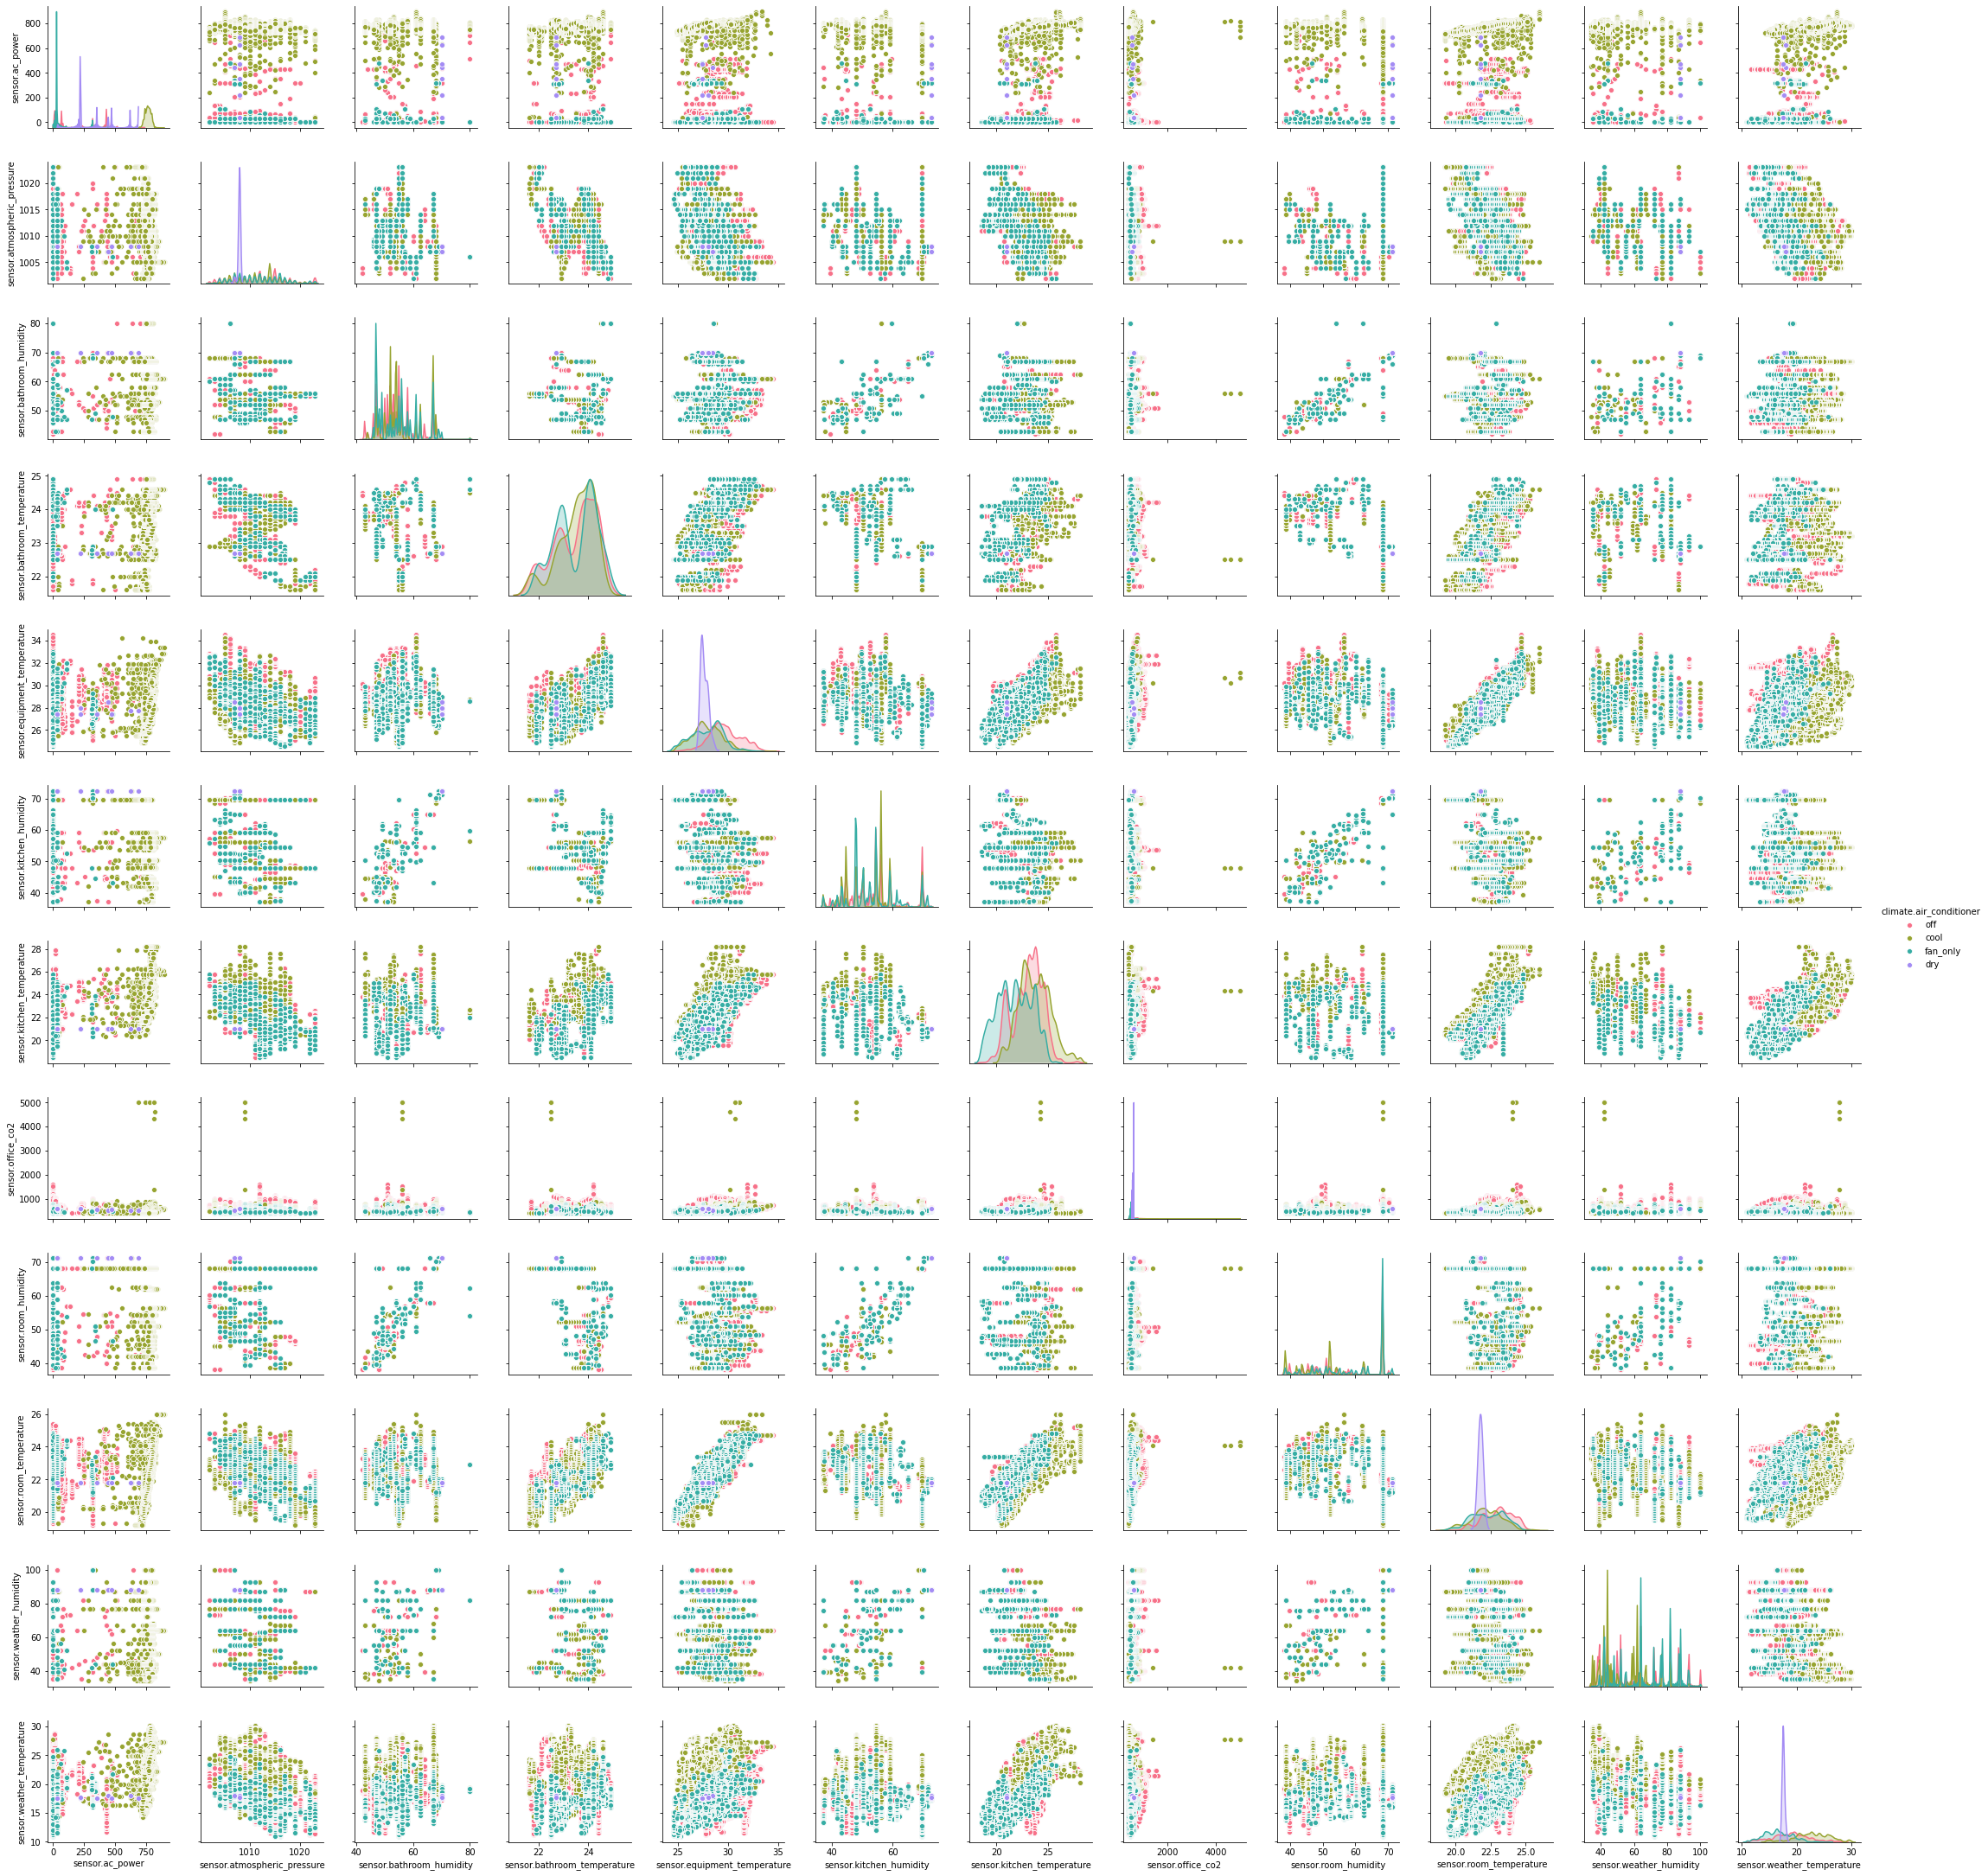

In [9]:
sns_paiplot = sns.pairplot(df, hue='climate.air_conditioner', palette="husl", diag_kws={'bw': 0.2})

Looks impressive, but let's be honest - not very informative.
Let's look on the data that might be inderdependant, collinear, etc.

**Humidity pairplot**

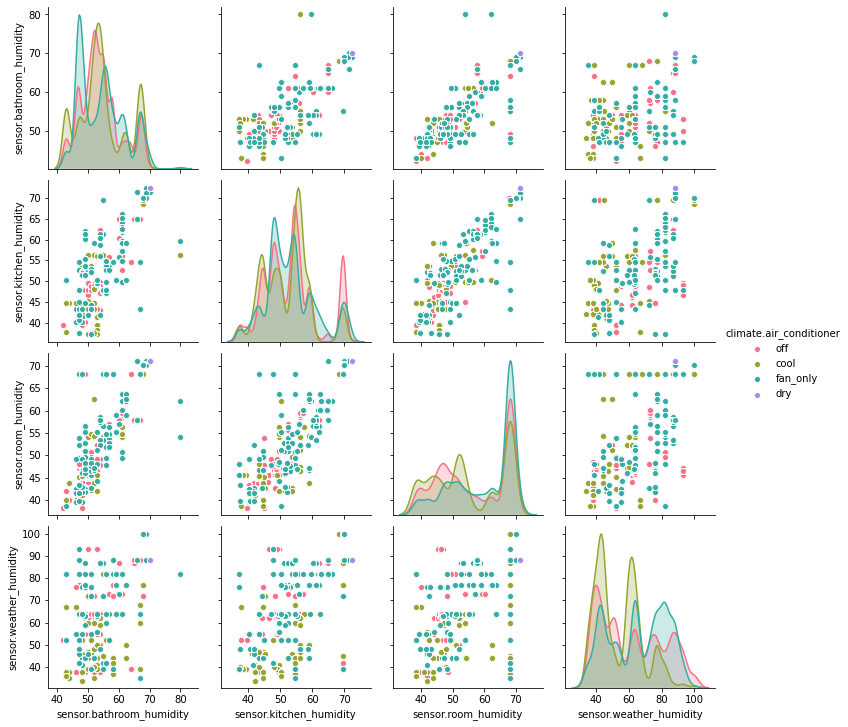

In [10]:
sns_paiplot = sns.pairplot(df[['climate.air_conditioner',
                                     'sensor.bathroom_humidity',
                                     'sensor.kitchen_humidity',
                                     'sensor.room_humidity',
                                     'sensor.weather_humidity']],
                           hue='climate.air_conditioner', palette="husl")

Some observations:
- outside humidity does not show strong relation to inside humidity
- colling mode of air conditioner was mostly used when outside humidity is low:
    - remembering that it's relative humidity, the simplest explanation is that cooling was used on the hot days
- kitchen, room and bathroom humidity are interdependant
    - if we decide to use them in our model, we can work with only one of them (room) or average value
    
**Temperature pairplot**

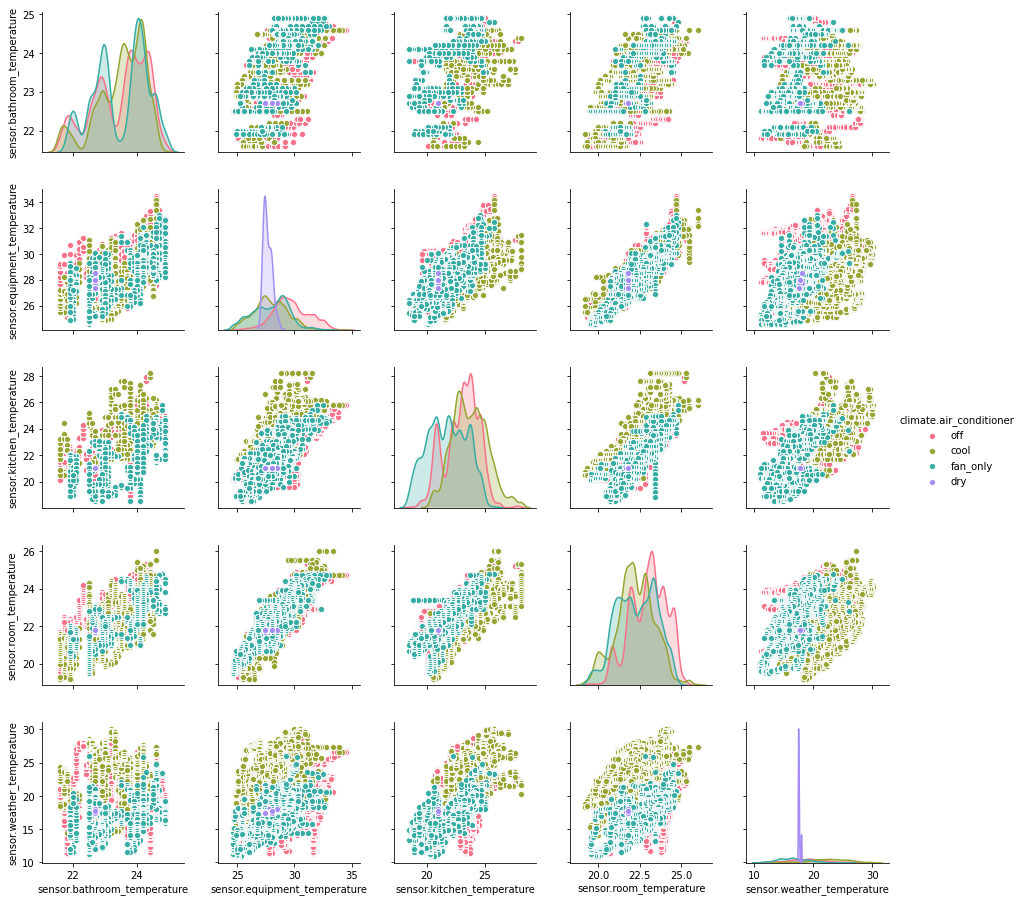

In [11]:
sns_paiplot = sns.pairplot(df[['sensor.bathroom_temperature',
                                     'sensor.equipment_temperature',
                                     'sensor.kitchen_temperature',
                                     'sensor.room_temperature',
                                     'sensor.weather_temperature',
                                     'climate.air_conditioner']],
                          hue='climate.air_conditioner', palette="husl")

Some observations:
- outside temperature is more related to inside temperature, then it was with humidity
- kitchen, room and equipment temperature are collineary dependant
- bathroom temperature correlate less with other inside temperatures ("bathroom microclimat")
    - it make sence to exclude bathroom temperature for our model
- we can work with only room or average of room, kitchen and maybe equipment temperature
    - for simplisity we worked with room temperature
- data for "dry mode" looks deficient

**Let's also look how our data shows up on the heatmap**

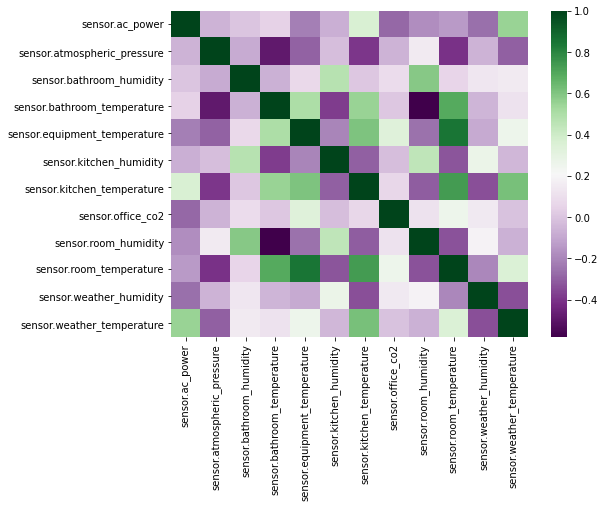

In [12]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(df.corr(), cmap="PRGn")

Observations:

- it's interesting to see, that running voltage of the air conditioner ('ac_power') shows more correlation with outside and kitchen temperature than with other inside temperatures (room, equipment, bathroom)
    - the explanation is probably that the air conditioner was used when on hot days
    - and kitchen temperature is not that much affected by using the aor conditioner, because the unit was placed in the room
    - it corroborate our decision to use room temperature for modelling
- another noticable thing - correlation between equipment temperature and carbon dioxide level in the room, which has obviously simple explanation - both increase when the flat owner is at home
- it make sense to have a closer look on correlation between (room) temperature and atmospheric pressure

**Let's now look now separately on the heatmaps for the data with air conditioner working/not working**

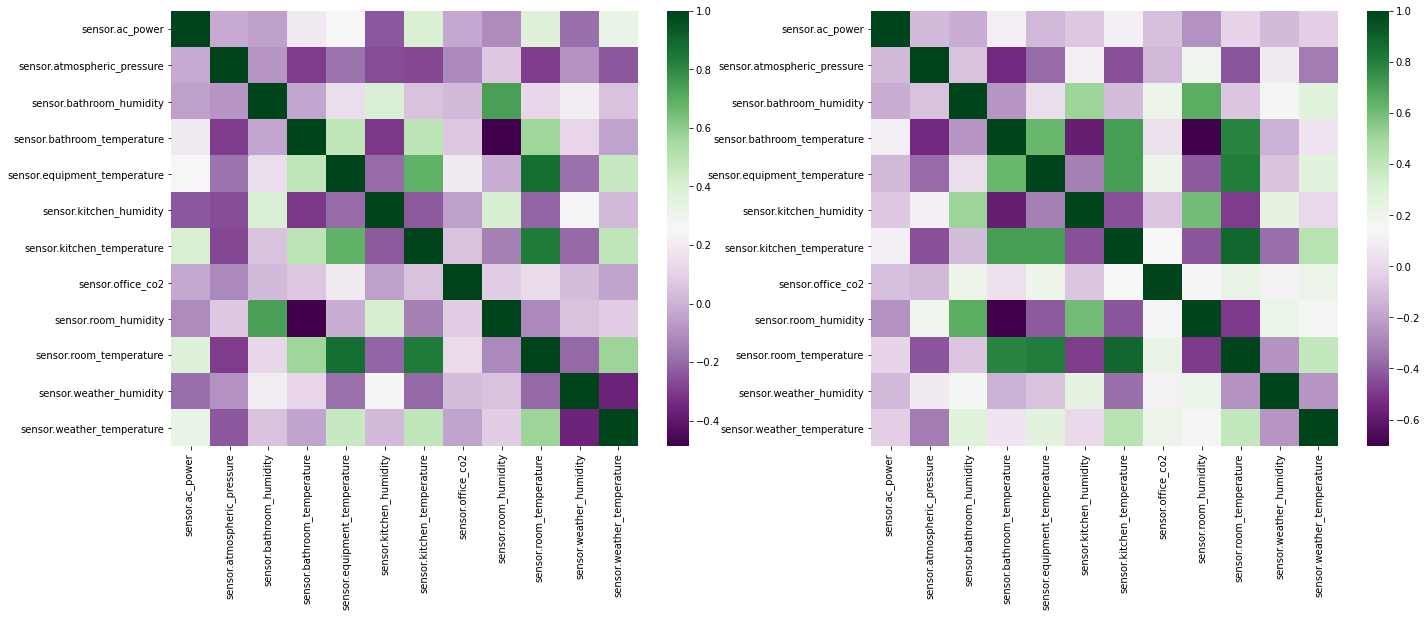

In [51]:
plt.rcParams['figure.figsize'] = (23,8)
fig, ax = plt.subplots(1,2)
sns.heatmap(df[df['climate.air_conditioner'] == 'cool'].corr(), cmap="PRGn", ax=ax[0])
sns.heatmap(df[df['climate.air_conditioner'] == 'off'].corr(), cmap="PRGn", ax=ax[1])

Observations:

- now we can see that the air conditioner was used mostly when it was hot in the room (and it stayed relatively hot despite cooling)

**Let's have a look at how often actually conditioning worked**

In [10]:
df[['climate.air_conditioner', 'sensor.ac_power']].groupby('climate.air_conditioner').count()

,sensor.ac_power
climate.air_conditioner,
cool,12312
dry,18
fan_only,14408
off,17902


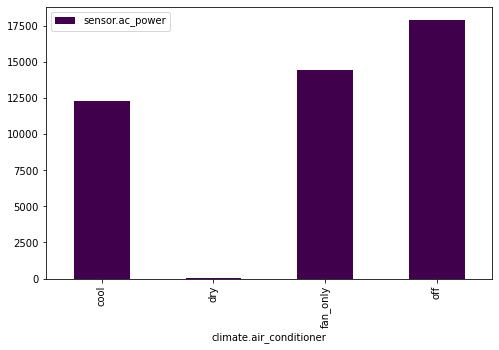

In [11]:
plt.rcParams['figure.figsize'] = (8,5)
df[['climate.air_conditioner', 'sensor.ac_power']].groupby('climate.air_conditioner').count().plot(kind='bar', colormap='PRGn')

Observations:

- majority of time the air conditioner was "off" (which gives us a lot of training data)
- "dry" mode was used very rarely
- "cool" mode was used much more rare than all other modes together

**Let's see how actually room temperature behaves in comparison with outside temperature for different air condidioner modes**

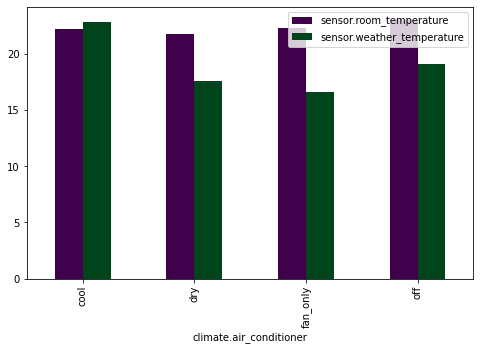

In [12]:
plt.rcParams['figure.figsize'] = (8,5)
df[['climate.air_conditioner',
          'sensor.room_temperature',
          'sensor.weather_temperature']].groupby('climate.air_conditioner').mean().plot(kind='bar', colormap='PRGn')

Observation:

- room temperature actually on average slightly lower than outside when "cooling" mode is used (air conditioning is working!)
- "off", "dry" and "fan" modes behave more or less the same in terms of temperature, therefore can be combined in one category

**Let's look how conditioning affects humidity**

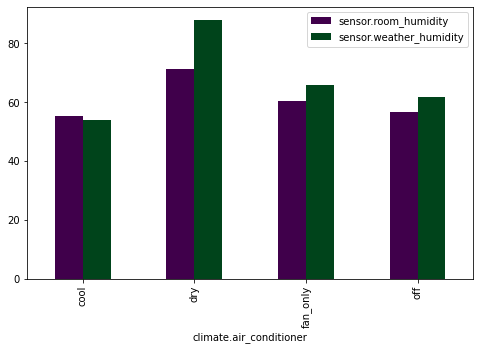

In [13]:
df[['climate.air_conditioner',
          'sensor.room_humidity',
          'sensor.weather_humidity']].groupby('climate.air_conditioner').mean().plot(kind='bar', colormap='PRGn')

Observation:
- normally inside humidity is lower, than ourside humidity
- things change when "cooling" mode is used
    - it is simply because "cooling" mode does not, probably, affect the absolute humidity, therefore with artificialy decreased temperature we see higher relative humidity
    - we can not use inside humidity for inside temperature prediction, because one depends on another

#### Let's check the effect of atmospheric pressure on temperature

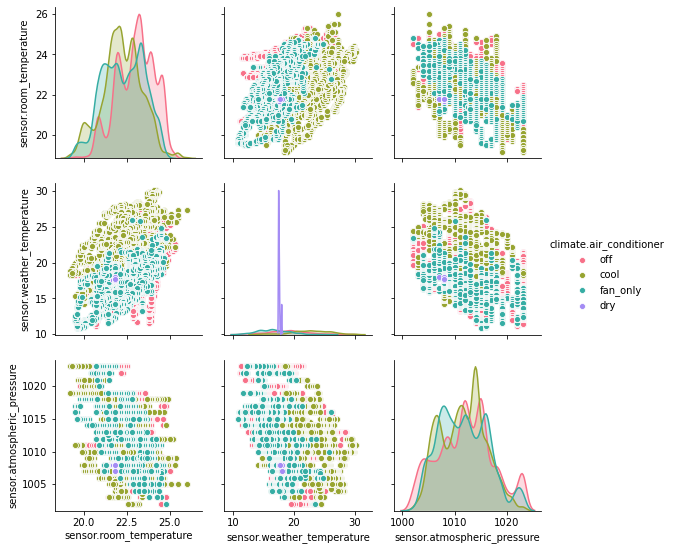

In [14]:
sns.pairplot(df[['sensor.room_temperature',
                       'sensor.weather_temperature',
                       'sensor.atmospheric_pressure',
                       'climate.air_conditioner']],
            hue='climate.air_conditioner',
            palette="husl")

Observation:

- it is not very clear if room temperature/atmospheric pressure dependancy is any different from those with outside temperature
- datapoints distribution looks different for different conditioning mode
- we can use atmospheric pressure in Linear models and have a look on coefficients, p-values, etc.

**Now let's have a look on binary/categorical data:**

We have possibly important observations from these sensors:
- binary_sensor.balcony_door
- binary_sensor.kitchen_window
- binary_sensor.room_window
- cover.balcony
- cover.windows
- person.one
- person.two

**Let's check how they all influence the difference between room and outside temperature**

In [23]:
df['temp_diff'] = df['sensor.room_temperature'] - df['sensor.weather_temperature']

Just one more time on performance of the air conditioner:

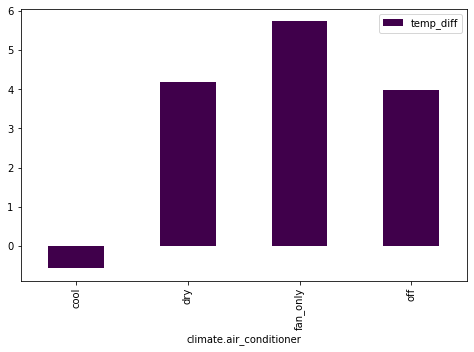

In [38]:
df[['climate.air_conditioner', 'temp_diff']].groupby('climate.air_conditioner').mean().plot(kind='bar', colormap='PRGn')

**Balcony door**

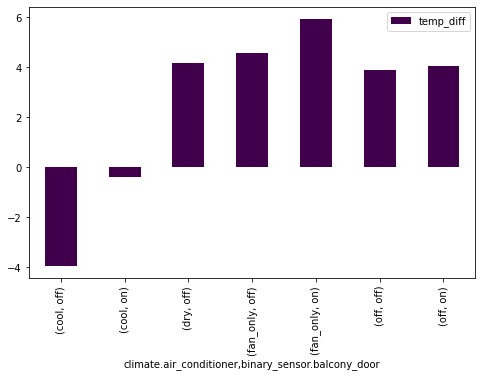

In [44]:
plt.rcParams['figure.figsize'] = (8,5)
df[['climate.air_conditioner',
    'binary_sensor.balcony_door',
    'temp_diff']].groupby(['climate.air_conditioner',
                           'binary_sensor.balcony_door']).mean().plot(kind='bar', colormap='PRGn')

Observations:
- it was unexpected, but we see, that cooling is more effective, when balcony door is open
    - actually, we found out that the air disposal was done througt the crack-open balcony door
    - that means we should exclude this information from our modelling
- in other cases room is cooler, if you keep the balcony door open

**Windows**

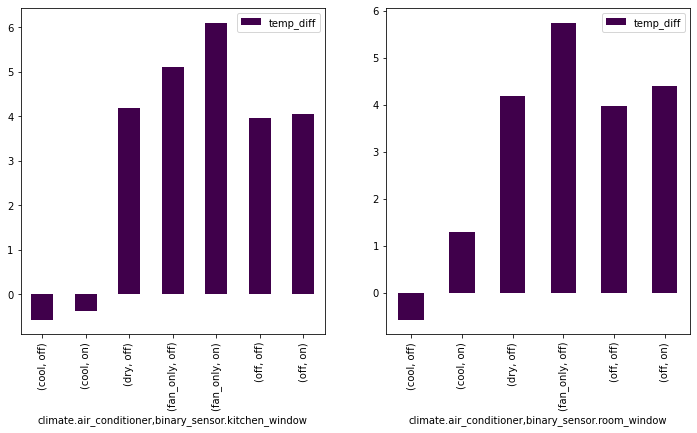

In [46]:
plt.rcParams['figure.figsize'] = (12,6)
fig, ax =plt.subplots(1,2)
df[['climate.air_conditioner',
          'binary_sensor.kitchen_window',
          'temp_diff'
         ]].groupby(['climate.air_conditioner',
                     'binary_sensor.kitchen_window'
                    ]).mean().plot(kind='bar', colormap='PRGn', ax=ax[0])
df[['climate.air_conditioner',
          'binary_sensor.room_window',
          'temp_diff'
         ]].groupby(['climate.air_conditioner',
                     'binary_sensor.room_window'
                    ]).mean().plot(kind='bar', colormap='PRGn', ax=ax[1])

Observations:

- looks like that for room window we can see pretty clear that it's cooler in the room, when the window is open, even with working air conditioner
- it's not easy to explain what we see..
- anyway, since these dependancies do not change for AC on/off, we can skip these data

**Windows cover**

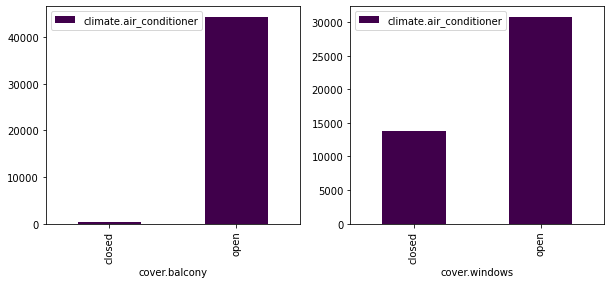

In [47]:
plt.rcParams['figure.figsize'] = (10,4)
fig, ax =plt.subplots(1,2)
df[['climate.air_conditioner',
          'cover.balcony'
         ]].groupby(['cover.balcony'
                    ]).count().plot(kind='bar', colormap='PRGn', ax=ax[0])
df[['climate.air_conditioner',
          'cover.windows'
         ]].groupby(['cover.windows'
                    ]).count().plot(kind='bar', colormap='PRGn', ax=ax[1])

Observations:

- as we can see, balcony cover was almost always closed, therefore we can ignore this sensor

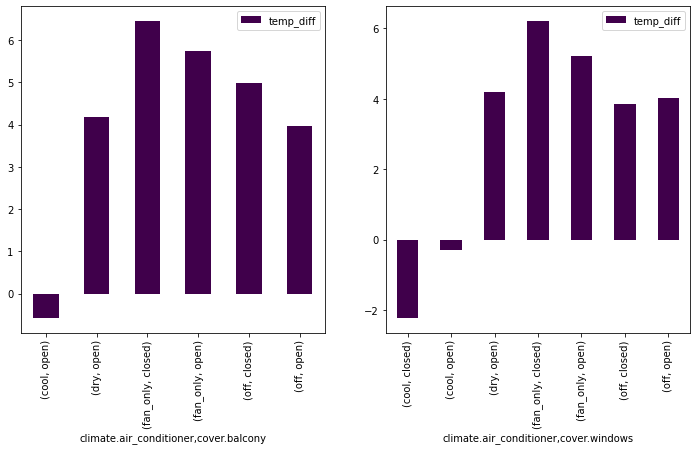

In [48]:
plt.rcParams['figure.figsize'] = (12,6)
fig, ax =plt.subplots(1,2)
df[['climate.air_conditioner',
          'cover.balcony',
          'temp_diff'
         ]].groupby(['climate.air_conditioner',
                     'cover.balcony'
                    ]).mean().plot(kind='bar', colormap='PRGn', ax=ax[0])
df[['climate.air_conditioner',
          'cover.windows',
          'temp_diff'
         ]].groupby(['climate.air_conditioner',
                     'cover.windows'

                    ]).mean().plot(kind='bar', colormap='PRGn', ax=ax[1])

Observations:

- for the windows cover there is no strong obvious influence on the room cooling
    - we can check it importance while building regression model
    
**People inside**

In our dataframe we have two columns, related to the presence of people in the flat: *person.one* is the owner and *person.two* is his partner (we inspect corona-summer, therefore other guests didn't present).
It seems logical to create a combined column with amount of people at home.

In [50]:
df[['person.one', 'person.two']].sample(5)

,person.one,person.two
2020-07-13 15:11:00,not_home,not_home
2020-07-14 19:22:00,not_home,not_home
2020-07-07 13:59:00,home,not_home
2020-07-30 21:16:00,home,home
2020-07-25 11:37:00,home,not_home


In [17]:
df.replace({'not_home':0, 'home':1}, inplace=True)
df['people'] = df['person.one'] + df['person.two']

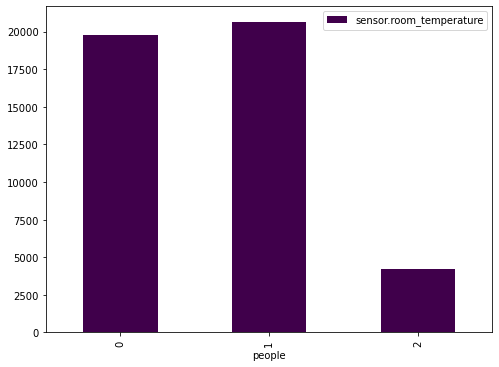

In [19]:
plt.rcParams['figure.figsize'] = (8,6)
df[['sensor.room_temperature', 'people']].groupby('people').count().plot(kind='bar', colormap='PRGn')

Observations:
- most of the time we see 0 or 1 person at home

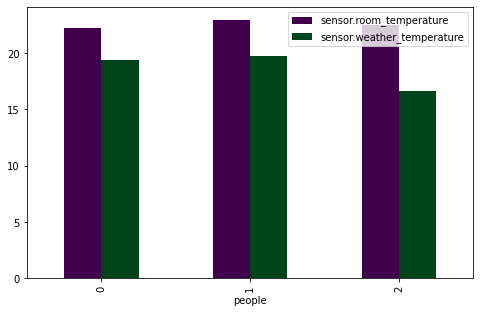

In [20]:
plt.rcParams['figure.figsize'] = (8,5)
df[['sensor.room_temperature',
          'sensor.weather_temperature',
          'people']].groupby('people').mean().plot(kind='bar', colormap='PRGn')

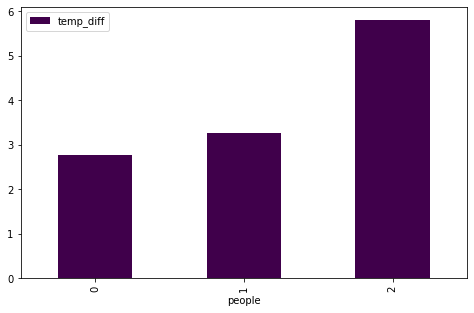

In [24]:
plt.rcParams['figure.figsize'] = (8,5)
df[['temp_diff', 'people']].groupby('people').mean().plot(kind='bar', colormap='PRGn')

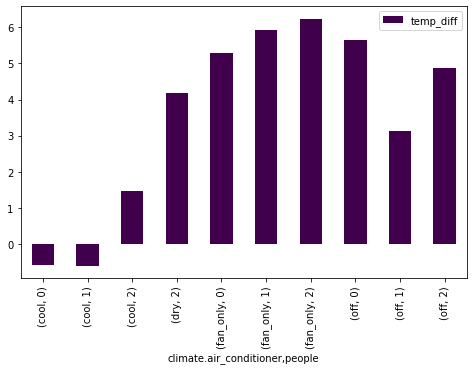

In [25]:
df[['climate.air_conditioner',
    'temp_diff',
    'people']].groupby(['climate.air_conditioner','people']).mean().plot(kind='bar', colormap='PRGn')

- we can not really say that there is direct dependancy between amount of people inside
    - probably the presence of the secon person depends on the weather and affects the usage of the air conditioner
- looking at this bar-plot, it looks logical to use 0, 1 and 2 people as separate values (use initial binary data for *person.one* and *person.two*)
 
**Just out of interest - let's look at how humidity and CO2 level depend on people inside**

In [28]:
df['sensor.office_co2'][1190:1200]

2020-07-01 19:50:00      NaN
2020-07-01 19:51:00      NaN
2020-07-01 19:52:00    505.5
2020-07-01 19:53:00    509.0
2020-07-01 19:54:00    511.0
2020-07-01 19:55:00    512.0
2020-07-01 19:56:00    513.0
2020-07-01 19:57:00    510.0
2020-07-01 19:58:00    513.0
2020-07-01 19:59:00    511.0
Name: sensor.office_co2, dtype: float64

Sensor was impremented in the evening on 1st of July, that's why will use the slice of data [1992:]

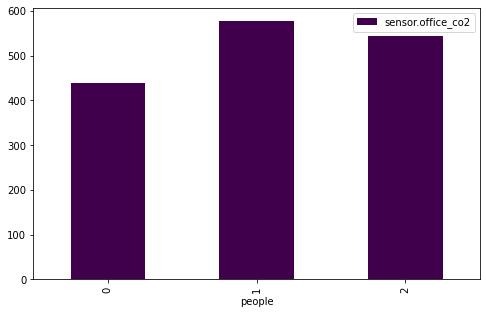

In [29]:
df[['sensor.office_co2','people']][1992:].groupby('people').mean().plot(kind='bar', colormap='PRGn')

Observations:
- again, hard to explain
- maybe our flat owner pay more attention to the air change when has guests? 👀

**Let's also look at how humidity depends on people presence**

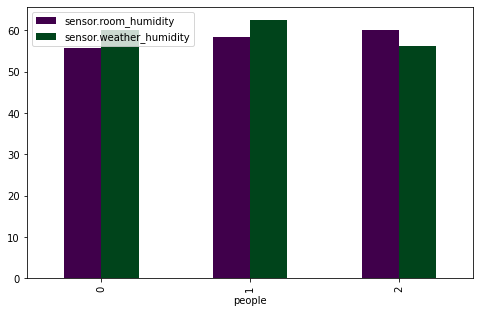

In [30]:
df[['sensor.room_humidity', 'sensor.weather_humidity', 'people']].groupby('people').mean().plot(kind='bar', colormap='PRGn')

Observations:
- here it looks like only two people noticeably increase inside humidity 👀

**Lastly, let's have a look if it makes sense to add some time-features**

**? Day of Month ?**

In [46]:
df['time_day'] = pd.to_datetime(df.index).day
df.head(3)

,sensor.ac_power,sensor.atmospheric_pressure,sensor.bathroom_humidity,sensor.bathroom_temperature,sensor.equipment_temperature,sensor.kitchen_humidity,sensor.kitchen_temperature,sensor.office_co2,sensor.room_humidity,sensor.room_temperature,...,binary_sensor.kitchen_window,binary_sensor.room_window,climate.air_conditioner,cover.balcony,cover.windows,person.one,person.two,people,temp_diff,time_day
2020-07-01 00:00:00,1.0,1004.0,42.0,24.5,29.7,39.5,23.8,NaN,38.3,22.6,...,off,off,off,open,open,0,0,0,3.9,1
2020-07-01 00:01:00,1.0,1004.0,42.0,24.5,29.7,39.5,23.8,NaN,38.3,22.6,...,off,off,off,open,open,0,0,0,3.9,1
2020-07-01 00:02:00,1.0,1004.0,42.0,24.5,29.7,39.5,23.8,NaN,38.3,22.6,...,off,off,off,open,open,0,0,0,3.9,1


In [47]:
grouped_by_day = df[['sensor.room_temperature', 'sensor.weather_temperature', 'time_day']].groupby('time_day').mean()
grouped_by_day['time_day'] = grouped_by_day.index
grouped_by_day.head(3)

,sensor.room_temperature,sensor.weather_temperature,time_day
time_day,,,
1,23.906597,20.185556,1
2,22.593403,20.566806,2
3,23.301250,19.721736,3


In [48]:
grouped_by_day = grouped_by_day.melt('time_day', var_name='location', value_name='temperature')
grouped_by_day.head(3)

,time_day,location,temperature
0,1,sensor.room_temperature,23.906597
1,2,sensor.room_temperature,22.593403
2,3,sensor.room_temperature,23.301250


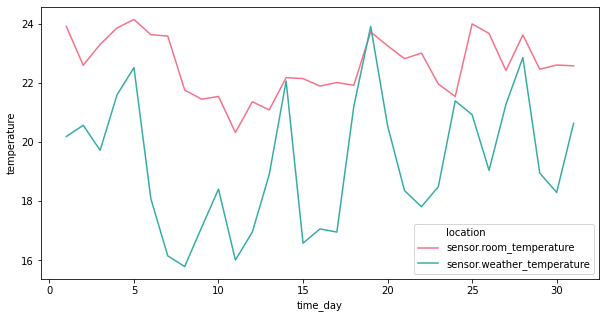

In [49]:
plt.rcParams['figure.figsize'] = (10,5)
sns.lineplot(data=grouped_by_day, x='time_day', y='temperature', hue='location', palette="husl")

It looks like we can not see any pattern or trend throught the month, Let's check it by looking at the difference of outside and inside temperatures.

In [56]:
df['time_day'] = pd.to_datetime(df.index).day
grouped_by_day_diff = df[['temp_diff', 'time_day']].groupby('time_day').mean()
grouped_by_day_diff['time_day'] = grouped_by_day_diff.index
grouped_by_day_diff = grouped_by_day_diff.melt('time_day', var_name='measurment', value_name='temp_diff')

In [57]:
grouped_by_day_diff.head()

,time_day,measurment,temp_diff
0,1,temp_diff,3.721042
1,2,temp_diff,2.026597
2,3,temp_diff,3.579514
3,4,temp_diff,2.260556
4,5,temp_diff,1.626458


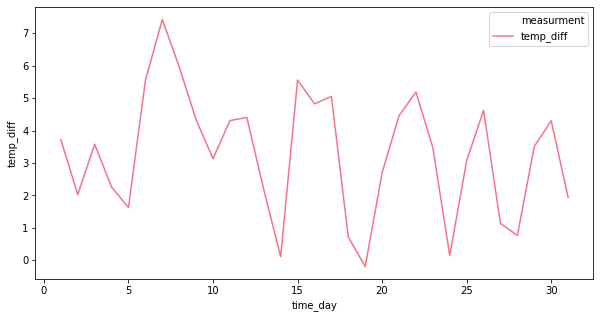

In [59]:
plt.rcParams['figure.figsize'] = (10,5)
sns.lineplot(data=grouped_by_day_diff, x='time_day', y='temp_diff', hue='measurment', palette="husl")

Now we can be sure that there is no pattern or trend throught the month.

**? Day of Week ?**

In [60]:
df['week_day'] = pd.to_datetime(df.index).weekday
grouped_by_weekday = df[['sensor.room_temperature', 'sensor.weather_temperature', 'week_day']].groupby('week_day').mean()
grouped_by_weekday['week_day'] = grouped_by_weekday.index
grouped_by_weekday = grouped_by_weekday.melt('week_day', var_name='location', value_name='temperature')

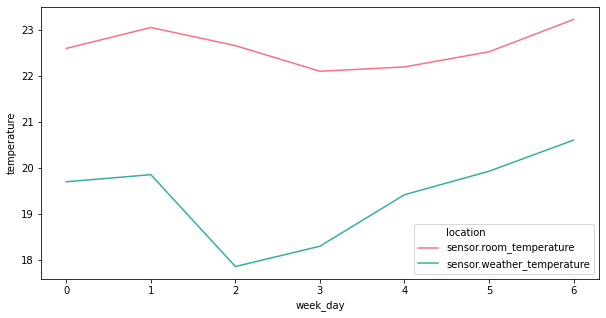

In [61]:
plt.rcParams['figure.figsize'] = (10,5)
sns.lineplot(data=grouped_by_weekday, x='week_day', y='temperature', hue='location', palette="husl")

With a high degree of confidence we can say, that there is no weekly trends or patterns as well.

**? Time ?**

In [62]:
df['time_hour'] = pd.to_datetime(df.index).hour
grouped_by_hour = df[['sensor.room_temperature', 'sensor.weather_temperature', 'time_hour']].groupby('time_hour').mean()
grouped_by_hour['time_hour'] = grouped_by_hour.index
grouped_by_hour = grouped_by_hour.melt('time_hour', var_name='location', value_name='temperature')

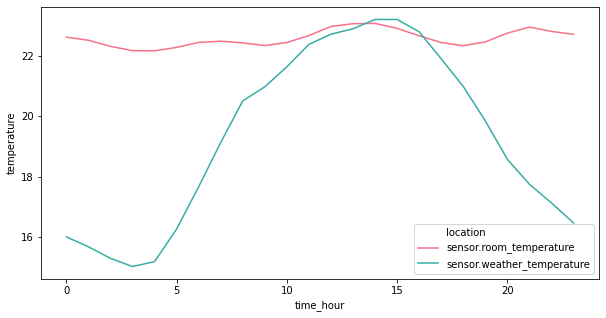

In [63]:
sns.lineplot(data=grouped_by_hour, x='time_hour', y='temperature', hue='location', palette="husl")

Looks like **time** affect outside temperature quite noticeably, whereas in contrast room temperature doesn't depend so much on time of the day.

Therefore:
- we can use hour-feature in our modelling
- we should pay attention. that dependance is not linear and for regression use on of two options:
    - beaning
    - polynomial features


## Important ourputs for ML-part

- for simplycity we can label our data as 1='cooling' and 0='not cooling'(all the other modes: off, dry, fan_only)
- we can try use ourside humidity and atmospheric pressure in Regression Model and look at coefficients and p-values
- we will also use some of binary sensors data:
    - binary_sensor.balcony_door (?)
    - cover.windows
    - person.one
    - person.two (?)
    - time (hour)